# Reguliazation 코드 정리 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### 3차함수에 노이즈 섞은 데이터 생성

In [2]:
np.random.seed(327)

# train data
x_train = np.linspace(-1,1,50)
y_train = x_train**3 + 0.1*x_train**2 - 0.15*x_train + 1.0 + 0.5*np.random.rand(len(x_train))

# test data
x_test = np.linspace(-1,1,50)
y_test = x_train**3 + 0.1*x_train**2 - 0.15*x_train + 1.0 + 0.5*np.random.rand(len(x_test))

# features
features_train = np.array([[xval] for xval in x_train])
labels_train = y_train.reshape(-1, 1)

features_test = np.array([[xval] for xval in x_test])
labels_test = y_test.reshape(-1, 1)

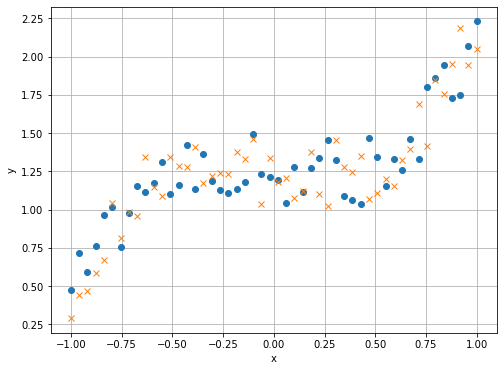

In [116]:
plt.figure(figsize=(8,6))
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, y_test, 'x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [3]:
def generate_batches(batch_size, features, labels):
    outout_batches = []
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
    return outout_batches

In [4]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 10
        num_hidden2 = 5
        
        self.w1 = tf.Variable(tf.random.normal([1,num_hidden1], seed=624))
        self.b1 = tf.Variable(tf.random.normal([num_hidden1], seed=624))
        
        self.w2 = tf.Variable(tf.random.normal([num_hidden1,num_hidden2], seed=624))
        self.b2 = tf.Variable(tf.random.normal([num_hidden2], seed=624))
        
        self.w3 = tf.Variable(tf.random.normal([num_hidden2,1], seed=624))
        self.b3 = tf.Variable(tf.random.normal([1], seed=624))
        
    def call(self, x):
        l1 = tf.matmul(x, self.w1) + self.b1
        h1 = tf.nn.sigmoid(l1)
        
        l2 = tf.matmul(h1, self.w2) + self.b2
        h2 = tf.nn.sigmoid(l2)
        
        yhat = tf.matmul(h2, self.w3) + self.b3
        return yhat

In [5]:
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features_train[shuffled_id]
shuffled_y_train = labels_train[shuffled_id]

### 1. 일반적인 신경망 모델 (MSE Loss function, Epoch : 500)

In [128]:
model = MyModel()

loss = lambda y, yhat : tf.reduce_mean(tf.square(yhat-y))
lr = 0.05
optimizer = tf.keras.optimizers.Adam(lr)

loss_train_history = []
loss_test_history = []

MaxEpoch = 500
batch_size = 10

for epoch in range(MaxEpoch):
    if epoch % 100 == 0:
        curr_loss = loss(labels_train, model(features_train))
        print(epoch, curr_loss.numpy())
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            
    loss_train = loss(labels_train, model(features_train))
    loss_test = loss(labels_test, model(features_test))
    loss_train_history.append(loss_train)
    loss_test_history.append(loss_test)

0 1.4046136
100 0.01735291
200 0.01700209
300 0.01692567
400 0.016860083


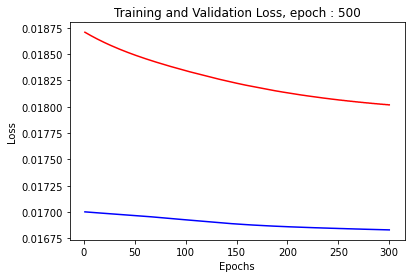

In [129]:
loss_train_history = loss_train_history[200:]
loss_test_history = loss_test_history[200:]

length = range(1, len(loss_train_history) + 1)

plt.plot(length, loss_train_history, 'b', label='Training loss')
plt.plot(length, loss_test_history, 'r', label='Validation loss')
plt.title(f'Training and Validation Loss, epoch : {MaxEpoch}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

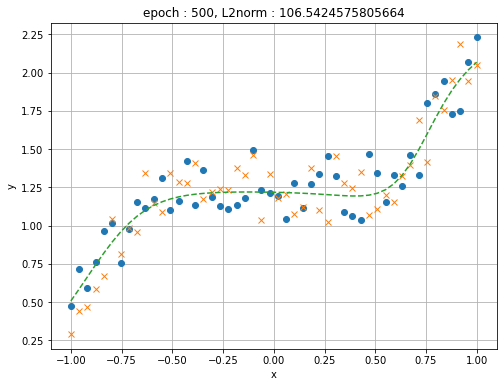

In [130]:
l2norm = tf.nn.l2_loss(model.w1) + tf.nn.l2_loss(model.w2) + tf.nn.l2_loss(model.w3)

plt.figure(figsize=(8,6))
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, y_test, 'x')
plt.plot(x_test, model(features_test), '--')
plt.title(f'epoch : {MaxEpoch}, L2norm : {l2norm}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### 2. 일반적인 신경망 모델 (MSE Loss function, Epoch : 2000)

In [131]:
model = MyModel()

loss = lambda y, yhat : tf.reduce_mean(tf.square(yhat-y))
lr = 0.05
optimizer = tf.keras.optimizers.Adam(lr)

loss_train_history = []
loss_test_history = []

MaxEpoch = 2000
batch_size = 10

for epoch in range(MaxEpoch):
    if epoch % 100 == 0:
        curr_loss = loss(labels_train, model(features_train))
        print(epoch, curr_loss.numpy())
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            
    loss_train = loss(labels_train, model(features_train))
    loss_test = loss(labels_test, model(features_test))
    loss_train_history.append(loss_train)
    loss_test_history.append(loss_test)

0 0.45139876
100 0.017200185
200 0.017023306
300 0.016960068
400 0.016902428
500 0.016857775
600 0.0168216
700 0.016791688
800 0.01676741
900 0.016748212
1000 0.016733304
1100 0.016721874
1200 0.016713193
1300 0.016706608
1400 0.016701527
1500 0.016697483
1600 0.016694093
1700 0.016691096
1800 0.016688243
1900 0.01668538


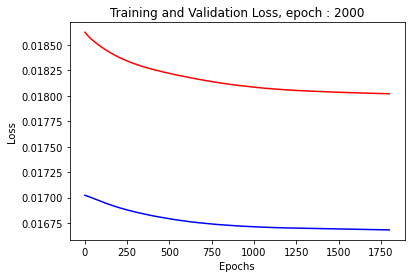

In [132]:
loss_train_history = loss_train_history[200:]
loss_test_history = loss_test_history[200:]

length = range(1, len(loss_train_history) + 1)

plt.plot(length, loss_train_history, 'b', label='Training loss')
plt.plot(length, loss_test_history, 'r', label='Validation loss')
plt.title(f'Training and Validation Loss, epoch : {MaxEpoch}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

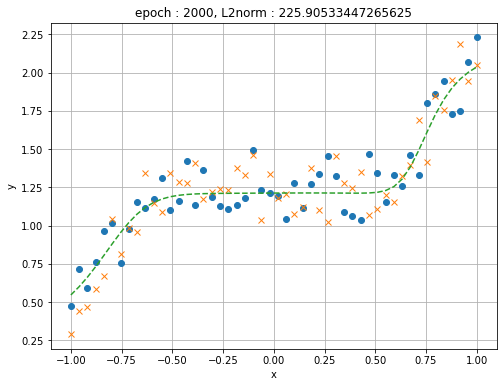

In [133]:
l2norm = tf.nn.l2_loss(model.w1) + tf.nn.l2_loss(model.w2) + tf.nn.l2_loss(model.w3)

plt.figure(figsize=(8,6))
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, y_test, 'x')
plt.plot(x_test, model(features_test), '--')
plt.title(f'epoch : {MaxEpoch}, L2norm : {l2norm}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### 3. 일반적인 신경망 모델 (MSE Loss function, Epoch : 15000)
### Overfitting 발생!!

In [6]:
model = MyModel()

loss = lambda y, yhat : tf.reduce_mean(tf.square(yhat-y))
lr = 0.05
optimizer = tf.keras.optimizers.Adam(lr)

loss_train_history = []
loss_test_history = []

MaxEpoch = 15000
batch_size = 10

for epoch in range(MaxEpoch):
    if epoch % 100 == 0:
        curr_loss = loss(labels_train, model(features_train))
        print(epoch, curr_loss.numpy())
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            
    loss_train = loss(labels_train, model(features_train))
    loss_test = loss(labels_test, model(features_test))
    loss_train_history.append(loss_train)
    loss_test_history.append(loss_test)

0 0.089578055
100 0.018392244
200 0.016972512
300 0.016814362
400 0.016704481
500 0.016615618
600 0.016545378
700 0.016489692
800 0.016441798
900 0.016393356
1000 0.01633491
1100 0.01653546
1200 0.016414836
1300 0.016335972
1400 0.016253775
1500 0.016171735
1600 0.016088245
1700 0.016010903
1800 0.015975183
1900 0.015949162
2000 0.01592284
2100 0.015892968
2200 0.015857432
2300 0.015822927
2400 0.015789544
2500 0.015756426
2600 0.015723137
2700 0.015689498
2800 0.015655354
2900 0.015620533
3000 0.015584581
3100 0.01554631
3200 0.0155023765
3300 0.015440041
3400 0.01528275
3500 0.014897321
3600 0.014536773
3700 0.014307116
3800 0.014173472
3900 0.014088712
4000 0.014193725
4100 0.013963104
4200 0.0137231685
4300 0.01314793
4400 0.013156939
4500 0.012959676
4600 0.01311478
4700 0.012700143
4800 0.012883152
4900 0.012492709
5000 0.012612964
5100 0.012377078
5200 0.012674592
5300 0.011803602
5400 0.011509405
5500 0.0114836255
5600 0.011288467
5700 0.011192099
5800 0.011573625
5900 0.010940

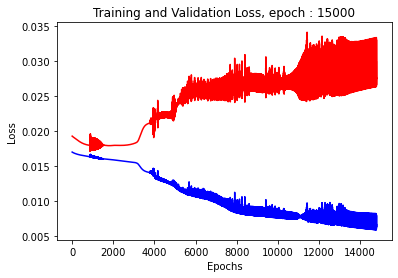

In [7]:
loss_train_history = loss_train_history[200:]
loss_test_history = loss_test_history[200:]

length = range(1, len(loss_train_history) + 1)

plt.plot(length, loss_train_history, 'b', label='Training loss') 
plt.plot(length, loss_test_history, 'r', label='Validation loss')
plt.title(f'Training and Validation Loss, epoch : {MaxEpoch}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

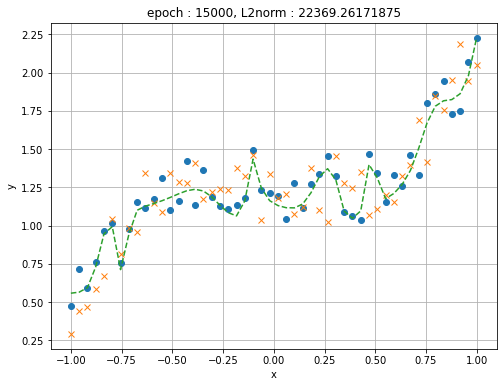

In [8]:
l2norm = tf.nn.l2_loss(model.w1) + tf.nn.l2_loss(model.w2) + tf.nn.l2_loss(model.w3)

plt.figure(figsize=(8,6))
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, y_test, 'x')
plt.plot(x_test, model(features_test), '--')
plt.title(f'epoch : {MaxEpoch}, L2norm : {l2norm}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### 4. L2 regulazation 신경망 모델 (Epoch : 15000)
### Overfitting 방지되고 L2 norm 값 준 것 확인!

In [9]:
model = MyModel()

beta = 1E-5
loss = lambda y, yhat, w1, w2, w3 : tf.reduce_mean(tf.square(yhat-y)) + beta*(tf.nn.l2_loss(w1) + tf.nn.l2_loss(w2) + tf.nn.l2_loss(w3))
lr = 0.05
optimizer = tf.keras.optimizers.Adam(lr)

loss_train_history = []
loss_test_history = []

MaxEpoch = 15000
batch_size = 10

for epoch in range(MaxEpoch):
    if epoch % 100 == 0:
        curr_loss = loss(labels_train, model(features_train), model.w1, model.w2, model.w3)
        print(epoch, curr_loss.numpy())
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch), model.w1, model.w2, model.w3)
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            
    loss_train = loss(labels_train, model(features_train), model.w1, model.w2, model.w3)
    loss_test = loss(labels_test, model(features_test), model.w1, model.w2, model.w3)
    loss_train_history.append(loss_train)
    loss_test_history.append(loss_test)

0 3.2845995
100 0.019071983
200 0.017530654
300 0.017467264
400 0.01744991
500 0.0174422
600 0.017437099
700 0.01743217
800 0.01742794
900 0.017426655
1000 0.017425152
1100 0.017422363
1200 0.017418902
1300 0.017415026
1400 0.017410818
1500 0.017406363
1600 0.017401757
1700 0.017397184
1800 0.01739279
1900 0.01738869
2000 0.017384876
2100 0.017381258
2200 0.017377827
2300 0.017374637
2400 0.017371671
2500 0.017368942
2600 0.017366393
2700 0.017363966
2800 0.017361647
2900 0.017359376
3000 0.017357204
3100 0.017355103
3200 0.017353123
3300 0.017351285
3400 0.01734962
3500 0.017348118
3600 0.017346783
3700 0.01734558
3800 0.01734448
3900 0.017343447
4000 0.01734245
4100 0.017341455
4200 0.017340455
4300 0.017339436
4400 0.017338388
4500 0.01733729
4600 0.017336145
4700 0.017334934
4800 0.017333666
4900 0.017332323
5000 0.017330915
5100 0.01732942
5200 0.017327866
5300 0.017326234
5400 0.01732457
5500 0.017322864
5600 0.017321168
5700 0.017319504
5800 0.017317865
5900 0.01731628
6000 0.01

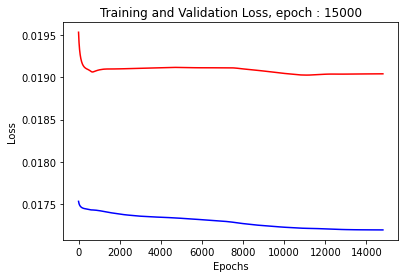

In [10]:
loss_train_history = loss_train_history[200:]
loss_test_history = loss_test_history[200:]

length = range(1, len(loss_train_history) + 1)

plt.plot(length, loss_train_history, 'b', label='Training loss')
plt.plot(length, loss_test_history, 'r', label='Validation loss')
plt.title(f'Training and Validation Loss, epoch : {MaxEpoch}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

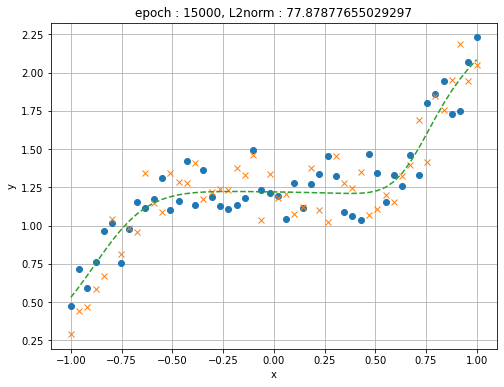

In [11]:
l2norm = tf.nn.l2_loss(model.w1) + tf.nn.l2_loss(model.w2) + tf.nn.l2_loss(model.w3)

plt.figure(figsize=(8,6))
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, y_test, 'x')
plt.plot(x_test, model(features_test), '--')
plt.title(f'epoch : {MaxEpoch}, L2norm : {l2norm}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### 4. L1 regulazation 신경망 모델 (Epoch : 15000)
### Overfitting 방지되고 L1 norm 값 준 것 확인!

In [19]:
model = MyModel()

beta = 1E-4
loss = lambda y, yhat, w1, w2, w3 : tf.reduce_mean(tf.square(yhat-y)) + beta*(tf.reduce_sum(tf.abs(w1)) + tf.reduce_sum(tf.abs(w2)) + tf.reduce_sum(tf.abs(w3)))
lr = 0.05
optimizer = tf.keras.optimizers.Adam(lr)

loss_train_history = []
loss_test_history = []

MaxEpoch = 15000
batch_size = 10

for epoch in range(MaxEpoch):
    if epoch % 100 == 0:
        curr_loss = loss(labels_train, model(features_train), model.w1, model.w2, model.w3)
        print(epoch, curr_loss.numpy())
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch), model.w1, model.w2, model.w3)
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            
    loss_train = loss(labels_train, model(features_train), model.w1, model.w2, model.w3)
    loss_test = loss(labels_test, model(features_test), model.w1, model.w2, model.w3)
    loss_train_history.append(loss_train)
    loss_test_history.append(loss_test)

0 0.45640907
100 0.023365967
200 0.02243028
300 0.022074666
400 0.021701409
500 0.021424055
600 0.021274397
700 0.021176893
800 0.02111132
900 0.021035053
1000 0.020936832
1100 0.020806005
1200 0.020614227
1300 0.02033928
1400 0.02007876
1500 0.019962218
1600 0.01992473
1700 0.019854434
1800 0.019803436
1900 0.019778442
2000 0.019761633
2100 0.019747237
2200 0.019723281
2300 0.019694965
2400 0.019626502
2500 0.01954498
2600 0.019486753
2700 0.019441225
2800 0.0194077
2900 0.01937114
3000 0.019349214
3100 0.019340327
3200 0.019332385
3300 0.019329455
3400 0.01932824
3500 0.019324096
3600 0.019316204
3700 0.019320017
3800 0.019322736
3900 0.019314563
4000 0.019316299
4100 0.019320834
4200 0.019320384
4300 0.019315165
4400 0.01931312
4500 0.019319072
4600 0.019320576
4700 0.019317627
4800 0.01931487
4900 0.019316569
5000 0.019312808
5100 0.0193172
5200 0.019318953
5300 0.019315807
5400 0.019316098
5500 0.019316567
5600 0.019311717
5700 0.019316018
5800 0.019315856
5900 0.019320907
6000 0.

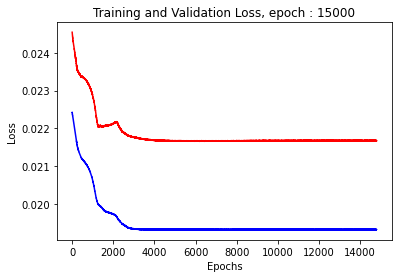

In [20]:
loss_train_history = loss_train_history[200:]
loss_test_history = loss_test_history[200:]

length = range(1, len(loss_train_history) + 1)

plt.plot(length, loss_train_history, 'b', label='Training loss')
plt.plot(length, loss_test_history, 'r', label='Validation loss')
plt.title(f'Training and Validation Loss, epoch : {MaxEpoch}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

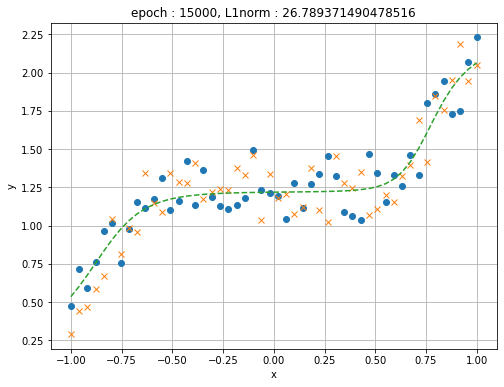

In [21]:
l1norm = (tf.reduce_sum(tf.abs(model.w1)) + tf.reduce_sum(tf.abs(model.w2)) + tf.reduce_sum(tf.abs(model.w3)))

plt.figure(figsize=(8,6))
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, y_test, 'x')
plt.plot(x_test, model(features_test), '--')
plt.title(f'epoch : {MaxEpoch}, L1norm : {l1norm}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### L2와 L2 norm 값 변화 추이 확인 

In [23]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

### L2 : 모두가 동시에 0으로 가는 것 같지만 확인해보면 값이 0이 아님을 확인

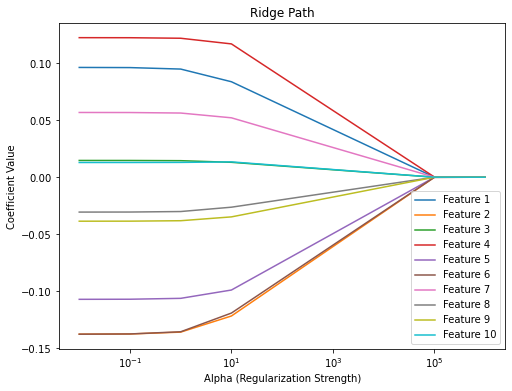

Ridge coefficients at alpha=1000000: 
[ 7.20323900e-06 -1.18823081e-05  2.35774460e-06  1.78871680e-05
 -1.25321377e-05 -9.69102521e-06  5.88128365e-06 -2.16457052e-06
 -4.41538639e-06  2.54034674e-06]


In [31]:
from sklearn.linear_model import Ridge
X, y = np.random.randn(100, 10), np.random.randn(100)

alphas = [0.01, 0.1, 1.0, 10, 10**5, 10**6]  # 정규화 강도 설정
coefs = []  # 가중치 저장할 리스트

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
plt.figure(figsize=(8, 6))

for i in range(len(coefs[0])):
    plt.plot(alphas, [coef[i] for coef in coefs], label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Path')
plt.legend()
plt.show()
print("Ridge coefficients at alpha={}: \n{}".format(alpha, ridge.coef_)) 

### L1 : 선택적으로 가중치가 0으로 가는 것 확인

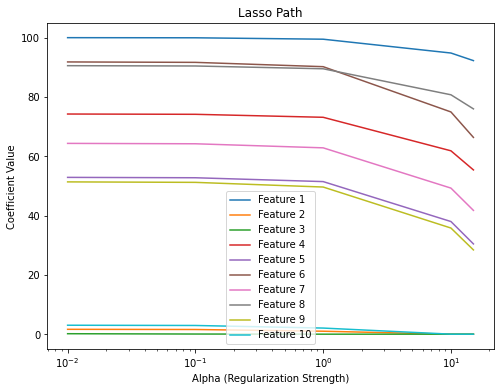

LASSO coefficients at alpha=15: 
[92.21801873  0.          0.         55.36792741 30.42297253 66.32781419
 41.7235966  75.95075838 28.40171054  0.        ]


In [27]:
X, y = make_regression(n_samples=100, n_features=10, noise=0.1)

alphas = [0.01, 0.1, 1.0, 10, 15]  # 정규화 강도 설정
coefs = []  # 가중치 저장할 리스트

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    
plt.figure(figsize=(8, 6))

for i in range(len(coefs[0])):
    plt.plot(alphas, [coef[i] for coef in coefs], label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Path')
plt.legend()
plt.show()
print("LASSO coefficients at alpha={}: \n{}".format(alpha, lasso.coef_))